# Valuations API Examples

## Run this example in [Colab](https://colab.research.google.com/github/SignalOceanSdk/SignalSDK/blob/master/docs/examples/jupyter/ValuationsAPI/Valuations%20API%20Example.ipynb) 

## Setup
Install the Signal Ocean SDK:
```
pip install signal-ocean
```
Set your subscription key acquired here: https://apis.signalocean.com/profile

In [1]:
signal_ocean_api_key = '58546f5d3e5b45929bbae0d9ac9d831b' #replace with your subscription key

## Retrieving a vessel valuation.
The Valuations API provides access to latest and historical SnP valuation of vessels.
There are 3 functions available:

1. Latest valuation for a given IMO
2. Details of latest valuation for a given IMO
3. All valuations for a given IMO

The IMO should be given as an input for the function.

In [2]:
from signal_ocean.vessel_valuations import VesselValuationsAPI
from signal_ocean import Connection
connection = Connection(signal_ocean_api_key)

api = VesselValuationsAPI(connection)
vessel_imo = 9412036
latest_valuation = api.get_latest_valuation_by_imo(imo=vessel_imo).valuation_price
latest_valuation *= 1000000

print(f"Latest valuation for imo: {vessel_imo} is ${latest_valuation}")

Latest valuation for imo: 9412036 is $46863206.0


Plot a trend on how the vessel valuation has changed over time.

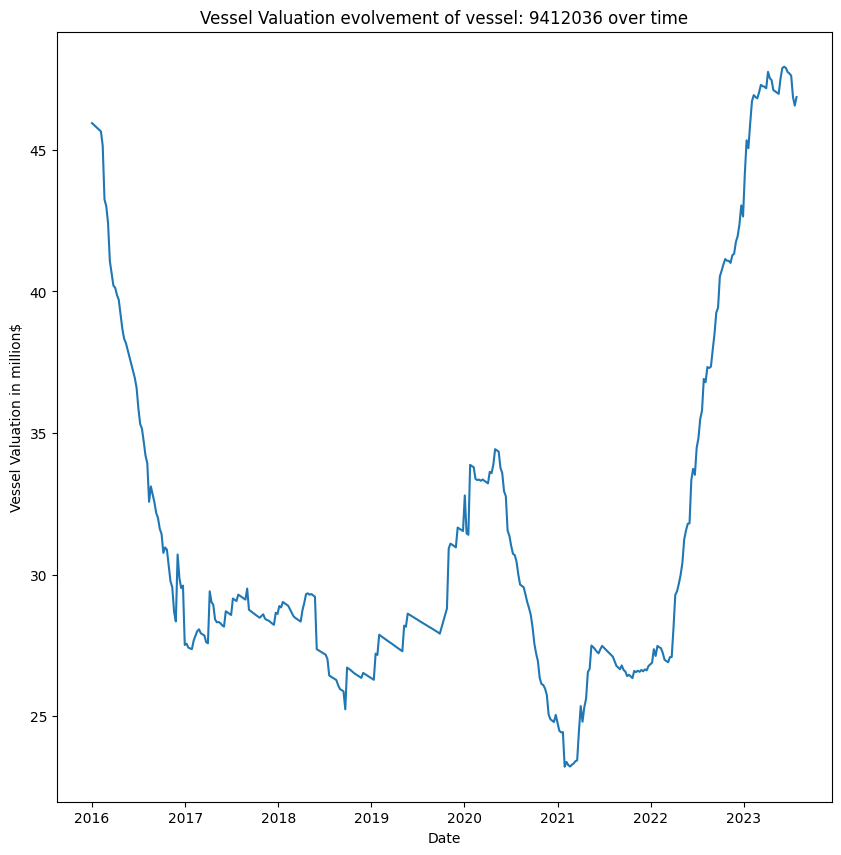

In [3]:
import pandas as pd
import matplotlib.pyplot as plt

all_valuations = api.get_all_historical_valuations_by_imo(imo=vessel_imo)
df = pd.DataFrame.from_records([v.to_dict() for v in all_valuations])
dateTimeIndex= pd.DatetimeIndex(df['valueFrom'])

# Create figure and plot space
fig, ax = plt.subplots(figsize=(10, 10))
ax.plot(dateTimeIndex,
        df['valuationPrice'])

# Set title and labels for axes
ax.set(xlabel="Date",
       ylabel="Vessel Valuation in million$",
       title= f"Vessel Valuation evolvement of vessel: {vessel_imo} over time")

plt.show()